In [1]:
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
import folium
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [2]:
agePeople = pd.read_csv('../../Data/people/행정안전부_주민등록_인구_및_세대현황.csv', index_col=0)#, encoding='euc-kr')#, index_col='시점')
agePeople.head()

,년도,나이,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별시
1,2014,0-9,793992,263767,208524,270156,145156,148662,114860,19524,1243973,124511,142815,196099,161307,157224,222679,316462,61663
2,2014,10-19,1044513,366769,307096,339868,207671,196196,148060,17155,1533881,178979,188890,237378,228459,220929,291169,402689,79202
3,2014,20-29,1457951,456897,323936,398391,197540,210031,156137,17532,1608430,181760,194013,242365,217542,204149,312801,391686,70883
4,2014,30-39,1713666,504816,353237,461260,227820,237696,182664,27648,1991551,194502,220756,300806,239288,228077,356199,486893,84968
5,2014,40-49,1729469,576487,446088,521070,260090,271600,216238,26757,2303367,252750,265726,333778,303136,296355,433992,585426,107887


In [3]:
agePeople.shape

(88, 19)

In [4]:
agePeople['나이'].unique()

array(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80-89', '90-99', '100-'], dtype=object)

In [5]:
agePeople.년도.unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [6]:
agePeople[agePeople.년도 == 2014]

,년도,나이,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별시
1,2014,0-9,793992,263767,208524,270156,145156,148662,114860,19524,1243973,124511,142815,196099,161307,157224,222679,316462,61663
2,2014,10-19,1044513,366769,307096,339868,207671,196196,148060,17155,1533881,178979,188890,237378,228459,220929,291169,402689,79202
3,2014,20-29,1457951,456897,323936,398391,197540,210031,156137,17532,1608430,181760,194013,242365,217542,204149,312801,391686,70883
4,2014,30-39,1713666,504816,353237,461260,227820,237696,182664,27648,1991551,194502,220756,300806,239288,228077,356199,486893,84968
5,2014,40-49,1729469,576487,446088,521070,260090,271600,216238,26757,2303367,252750,265726,333778,303136,296355,433992,585426,107887
6,2014,50-59,1604160,630397,415681,482300,212836,237648,196210,20781,1896033,267736,255182,313612,293042,304092,451711,542595,92145
7,2014,60-69,980220,401805,235408,232989,119644,124378,90542,12369,936958,160635,146731,196659,198061,214646,292417,309526,53120
8,2014,70-79,568848,235574,148568,138554,74942,74926,44785,9688,599700,130099,115403,163686,157179,192592,235172,218473,38415
9,2014,80-89,177339,72728,48605,49951,26232,26713,14847,4081,210845,45895,43469,68455,64428,76455,92195,86183,15722
10,2014,90-99,28404,8754,5620,7451,3653,3699,1906,556,30333,7021,5548,8814,8515,10560,11767,9768,3140


In [40]:
seoul14 = agePeople[agePeople['년도']==2014].iloc[:,0:3]
aeoul21 = agePeople[agePeople['년도']==2021].iloc[:,0:3]
aeoul21.set_index(keys='나이',inplace=True, drop=True)
aeoul21.drop(['년도'], axis=1, inplace=True)
seoul14.set_index(keys='나이',inplace=True, drop=True)
seoul14.drop(['년도'], axis=1, inplace=True)
# seoul1421 = pd.concat([agePeople[agePeople['년도']==2014].iloc[:,0:3],agePeople[agePeople['년도']==2021].iloc[:,0:3]], axis=1)
# seoul1421.set_index(keys='나이',inplace=True, drop=True)
# seoul1421.drop(['년도'], axis=1, inplace=True)
# seoul1421
seoul1421 = pd.concat([seoul14,aeoul21], axis=1)
seoul1421.columns = ['2014년 서울','2021년 서울']

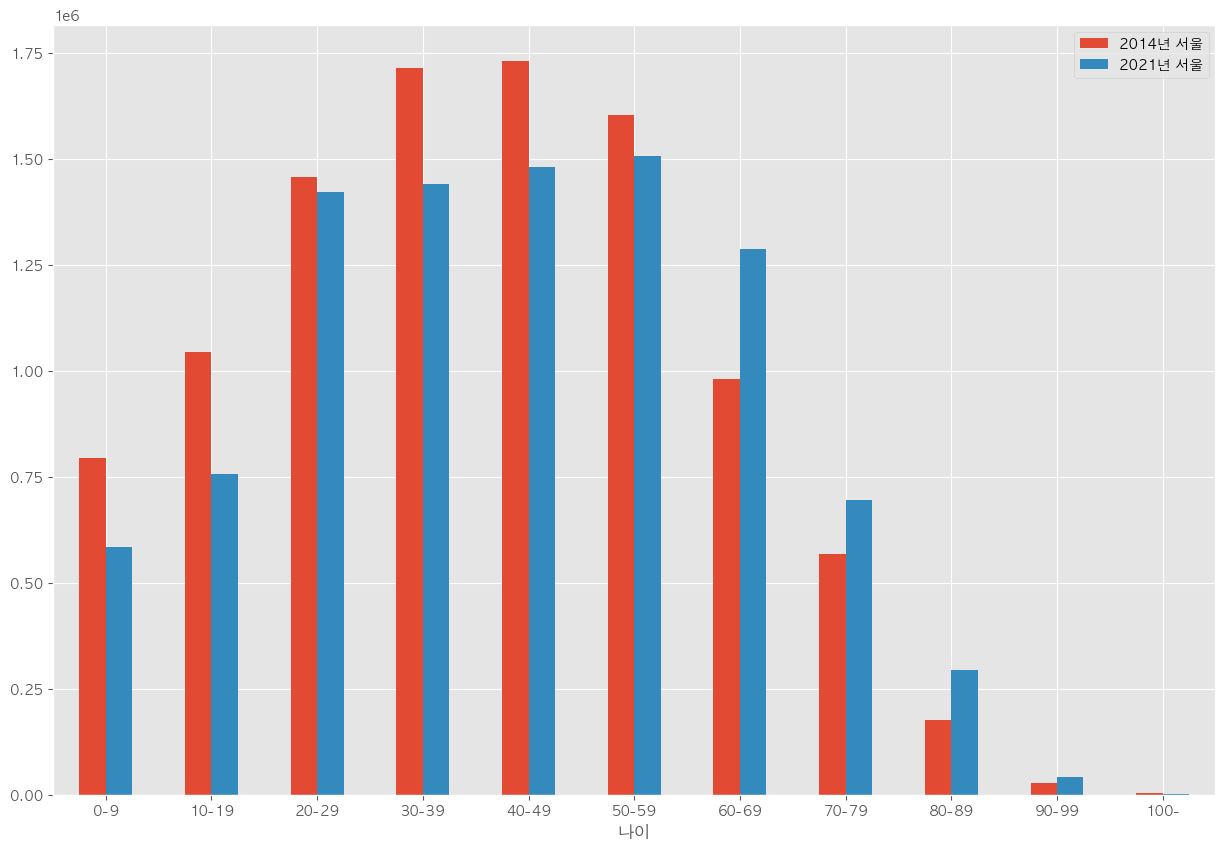

In [42]:
plt.style.use('ggplot')
seoul1421.plot(
    kind='bar', 
    figsize=(15,10),
    # color = terrain.colors,
    )

plt.xticks(rotation="horizontal",size=10) # vertical은 90도
# plt.ylabel("의료인수(단위:명)", size=15)
# plt.title('21년 시도별 의료인력 현황')

plt.show()